Abstract:

Data is dynamic and can be easily lost or corrupted if data administrators and users are not careful about it. A retail dataset from Flora company has an issue regarding the type of customer classification: some data is missing. Fortunately, we had developed 2 classification models to statistically predict the missing data values with a Logistic Regression model (accuracy: 83%) and a Knn model (accuracy: 83%, not overfitted). Concluding, models can be improved by the iteration process of the seed’s values and other classification models such as Naïve-Bayes to better understand the variables and their relationships with the type of customer.


In this analysis we will keep the following order:

1.- Feature engineering in both the continuous and categorical data.

2.- Logistic regression model.

3.- Knn regression model.

4.- Predicting the unknown variables

5.- Overall conclusions.

Feature Engineering Steps:

1.- Replacing NaN (NULLs) and "?" symbols.

2.- Re categorize the categorical variables through the use of for loops.

3.- Descriptive analysis for continuous variables in order to check for skewness. 
In case of skewness, creation of logarithmic variables to normalize the data.

4.- Creation of dummy variables (binary) for higher precision in categorical variables.

In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np 
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# reading the file into Python
retail = pd.read_csv('./__datasets/H_Retail_final.csv')


# outputting the first ten rows of the dataset
retail.head(n = 10)

,customer_id,sex_at_birth,age,occupation,employment_type,education,completed_years_of_education,marital_status,relationship_in_household,race,country,type_of_client,total_revenue_by_customer,average_spending_per_unit_per_customer,total_quantity_per_customer,total_products_per_customer,max_spend_per_unit_per_customer,min_spend_per_unit_per_customer,max_quantity_per_customer,min_quantity_per_customer
0,528056,F,34,Exec-managerial,Private,Some-college,10,Married-civ-spouse,Wife,White,United-States,NaN,311.30,2.746286,668,35,15.00,0.10,576,-12
1,1296893,M,35,Transport-moving,Private,Bachelors,13,Married-civ-spouse,Husband,White,United-States,NaN,945.96,2.083486,406,109,8.50,0.42,10,1
2,4223924,M,40,Sales,Private,Bachelors,13,Divorced,Not-in-family,White,United-States,Wholesaler,240.46,3.073000,102,40,12.75,0.29,8,1
3,4523882,F,60,Transport-moving,Self-emp-not-inc,Assoc-voc,11,Married-civ-spouse,Wife,White,Germany,NaN,193.66,4.620000,46,15,11.95,0.42,8,1
4,5060461,F,52,Adm-clerical,Private,HS-grad,9,Never-married,Not-in-family,White,United-States,NaN,186.28,2.154324,172,37,15.00,0.42,108,1
5,7199299,F,21,Other-service,Private,Some-college,10,Never-married,Own-child,White,United-States,NaN,251.31,2.886591,124,44,12.75,0.29,8,1
6,7775023,M,30,Adm-clerical,State-gov,Bachelors,13,Married-spouse-absent,Not-in-family,White,United-States,NaN,562.57,3.799655,167,58,35.95,0.42,10,-2
7,8799332,M,75,Sales,Self-emp-not-inc,HS-grad,9,Divorced,Not-in-family,White,United-States,NaN,154.26,3.836190,44,21,19.95,0.42,6,-3
8,12379538,M,28,Prof-specialty,Self-emp-not-inc,Masters,14,Never-married,Own-child,White,United-States,NaN,1244.60,2.256822,567,107,5.95,0.29,10,1
9,12667659,M,26,Farming-fishing,Private,Bachelors,13,Never-married,Own-child,White,United-States,NaN,109.52,3.241250,29,16,12.75,0.42,6,1


In [2]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {retail.shape[0]}
Features:     {retail.shape[1]}
""")
#it is important to verify the shape of the dataset to understand it


Size of Original Dataset
------------------------
Observations: 4058
Features:     20



In [3]:
# we understand the vraibles through the information about each variable
retail.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             4058 non-null   int64  
 1   sex_at_birth                            4058 non-null   object 
 2   age                                     4058 non-null   int64  
 3   occupation                              4058 non-null   object 
 4   employment_type                         4058 non-null   object 
 5   education                               4058 non-null   object 
 6   completed_years_of_education            4058 non-null   int64  
 7   marital_status                          4058 non-null   object 
 8   relationship_in_household               4058 non-null   object 
 9   race                                    4058 non-null   object 
 10  country                                 4058 non-null   obje

In [4]:
# this step gives us a further understanding of the data with descriptive statistics for numeric data
retail.describe(include = 'number').round(decimals=2)

,customer_id,age,completed_years_of_education,total_revenue_by_customer,average_spending_per_unit_per_customer,total_quantity_per_customer,total_products_per_customer,max_spend_per_unit_per_customer,min_spend_per_unit_per_customer,max_quantity_per_customer,min_quantity_per_customer
count,4.058000e+03,4058.00,4058.00,4058.00,4058.00,4058.00,4058.00,4058.00,4058.00,4058.00,4058.00
mean,2.191624e+09,38.28,10.09,968.01,5.95,496.95,78.54,28.54,2.80,95.74,-4.37
std,1.227247e+09,13.45,2.52,4933.65,76.28,2933.67,194.95,195.19,75.74,1746.23,1745.80
min,5.280560e+05,17.00,1.00,-4287.63,0.00,-904.00,1.00,0.00,0.00,-96.00,-80995.00
25%,1.140486e+09,27.00,9.00,139.56,2.23,50.00,15.00,7.95,0.21,8.00,-2.00
50%,2.227694e+09,37.00,10.00,332.45,2.95,128.50,36.00,12.50,0.42,10.00,1.00
75%,3.268306e+09,47.00,12.00,788.78,3.94,327.75,85.00,16.95,0.72,10.00,1.00
max,4.293960e+09,91.00,16.00,185795.45,4287.63,114894.00,6389.00,8142.75,4287.63,80995.00,74215.00


In [5]:
# taking the retail dataset and then transforming it into boolean based on if a value is null
# and then summing together the results per column
retail.isnull().sum(axis = 0)

customer_id                                  0
sex_at_birth                                 0
age                                          0
occupation                                   0
employment_type                              0
education                                    0
completed_years_of_education                 0
marital_status                               0
relationship_in_household                    0
race                                         0
country                                      0
type_of_client                            3084
total_revenue_by_customer                    0
average_spending_per_unit_per_customer       0
total_quantity_per_customer                  0
total_products_per_customer                  0
max_spend_per_unit_per_customer              0
min_spend_per_unit_per_customer              0
max_quantity_per_customer                    0
min_quantity_per_customer                    0
dtype: int64

In [6]:
#The following steps are to analyze the data by plotting the different variables 
#in order to analyze if we need any type of transformation
#for the prupose of this work we won't be plotting any of the graphs. 
#Nonetheless,we will keep them as comments

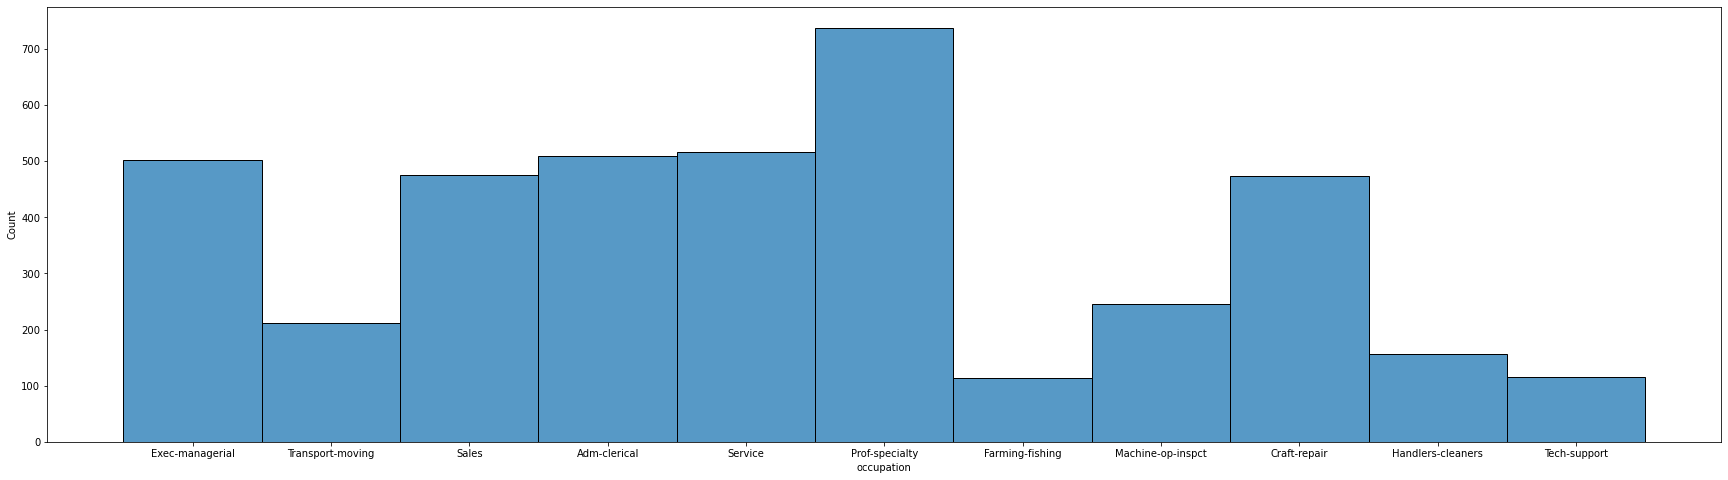

In [6]:
#We group together priv-house, protective-serv and other-service since the number of observations is lower than 100
retail['occupation'] = retail['occupation'].replace(['Priv-house-serv', 'Protective-serv', 'Other-service'] , 'Service')

# fill the ''?'' are regrouping the catigorical variabl in occupation as it represents the mode
retail['occupation'] = retail['occupation'].replace(['?'] , 'Prof-specialty')

#We plot the histogram of the occupations
plt.figure(figsize=(30,8),edgecolor='blue')
sns.histplot(retail['occupation'])
plt.show()


Private            3052
Government          535
Self-employment     471
Name: employment_type, dtype: int64


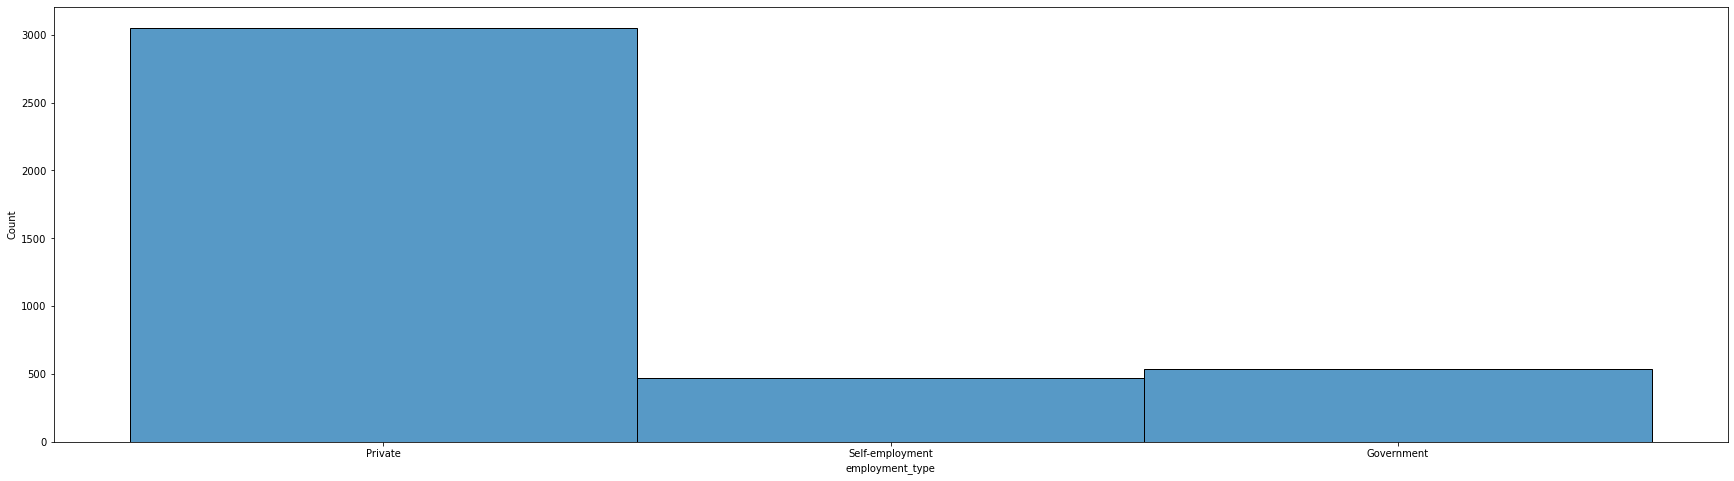

In [8]:
#Similarly we change the name of the variables in order to make them more explicit
#We start a for loop to go through all the rows 
for index, value in retail.iterrows():
        
    #we start the if statement 
    if "gov" in retail.loc[index, 'employment_type']:
        #change to government
        retail.loc[index, "employment_type"] = 'Government'
    
    #elif statement
    elif "Self" in retail.loc[index, 'employment_type']:
        #change to self-employment
        retail.loc[index, "employment_type"] = 'Self-employment'
    
    #else statement
    else:
        #change to private
        retail.loc[index, "employment_type"] = 'Private'

#We verify the number of observations        
print(retail["employment_type"].value_counts())

# histogram for employment_type 

plt.figure(figsize=(30,8),edgecolor='red')
sns.histplot(retail['employment_type'])

#rendering the plot
plt.show()

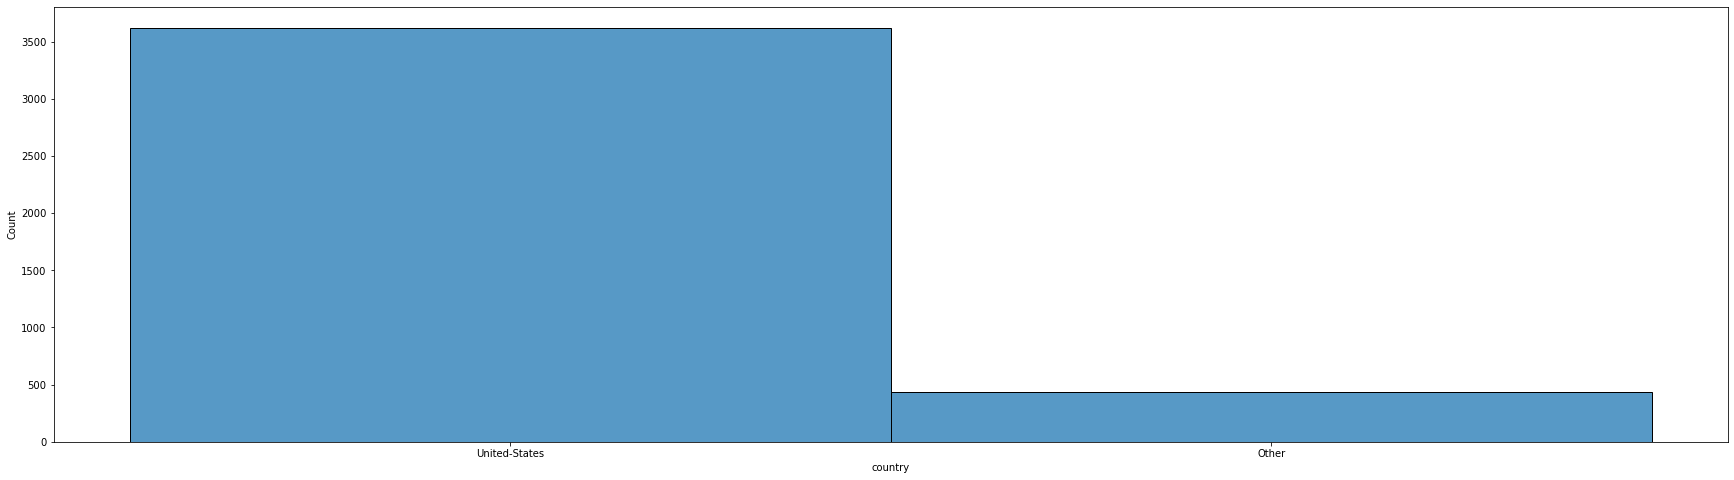

In [9]:
#we start the for loop in order to move through the different rows
for index, value in retail.iterrows():
        
    #if United-States we keep the name 
    if """United-States""" in retail.loc[index, 'country']:
        retail.loc[index, 'country'] = """United-States"""
    
    #any other type of country will be filled with other
    else:
        retail.loc[index, 'country'] = 'Other'

#We verify the number of observations        
#print(retail["country"].value_counts())

# histogram for country 
plt.figure(figsize=(30,8),edgecolor='blue')
sns.histplot(retail['country'])

# rendering the plot
plt.show()

In [10]:
# printing value counts for the rest  categorical variables to see if there is more than 100 observations in each and see if we need to group them
#for the purpose of clarity we will keep the results as comments in case someone needs to verify them too 

#we verify the sex_at_birth
print(f"""

Count of Sex_at_birth
==================
{retail["sex_at_birth"].value_counts(normalize = False)}

""")



Count of Sex_at_birth
M    2678
F    1380
Name: sex_at_birth, dtype: int64




In [11]:
#we verify the age
print(f"""
Count of Age
==================
{retail["age"].value_counts(normalize = False).sort_index()}

""")


Count of Age
17     28
18     56
19     95
20    106
21     98
22    107
23    107
24    101
25    123
26    102
27     96
28    106
29    108
30    104
31    118
32    110
33    132
34     97
35    119
36    107
37    103
38     94
39     98
40    103
41     97
42    109
43     85
44     90
45     88
46     97
47     94
48     75
49     77
50     65
51     68
52     56
53     55
54     42
55     48
56     52
57     46
58     45
59     43
60     46
61     31
62     34
63     25
64     31
65     17
66     17
67     19
68      3
69     14
70      9
71      9
72      3
73      7
74      6
75      3
76      5
77      2
78      6
79      6
80      1
81      4
83      2
84      1
85      1
86      1
90      3
91      2
Name: age, dtype: int64




In [12]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             4058 non-null   int64  
 1   sex_at_birth                            4058 non-null   object 
 2   age                                     4058 non-null   int64  
 3   occupation                              4058 non-null   object 
 4   employment_type                         4058 non-null   object 
 5   education                               4058 non-null   object 
 6   completed_years_of_education            4058 non-null   int64  
 7   marital_status                          4058 non-null   object 
 8   relationship_in_household               4058 non-null   object 
 9   race                                    4058 non-null   object 
 10  country                                 4058 non-null   obje

In [13]:
retail['age'] = retail['age'].astype('int')

#We therefore group the age by generation

#start of the for loop
for index, value in retail.iterrows():
        
    # start of for a range of age to take 'Gen Z' as a value
    if retail.loc[index, 'age'] <= 25:
        retail.loc[index, 'age'] = 'Gen Z'
    
    # start of for a range of age to take 'Millennials' as a value
    elif retail.loc[index, 'age'] > 25 and retail.loc[index, 'age'] <= 41 :
        retail.loc[index, 'age'] = 'Millennials'
    
    # start of for a range of age to take 'Gen X' as a value
    elif retail.loc[index, 'age'] > 41 and retail.loc[index, 'age'] <= 57 :
        retail.loc[index, 'age'] = 'Gen X'
    
    # start of for a range of age to take 'Boomers' as a value
    else:
        retail.loc[index, 'age'] = 'Boomers'

#We verify the count of the generations to make sure we have more than 100 observations 
#print(f"""
#Count of Age
#==================
retail["age"].value_counts(normalize = False)

#""")

Millennials    1694
Gen X          1147
Gen Z           821
Boomers         396
Name: age, dtype: int64

In [14]:
#we verify the education
print(f"""
Count of Education
==================
{retail["education"].value_counts(normalize = False).sort_index()}

""")


Count of Education
10th             120
11th             134
12th              48
1st-4th           16
5th-6th           29
7th-8th           82
9th               69
Assoc-acdm       140
Assoc-voc        168
Bachelors        645
Doctorate         45
HS-grad         1318
Masters          220
Preschool          7
Prof-school       68
Some-college     949
Name: education, dtype: int64




In [15]:
#We therefore group the education

#Masters and Doctorates are grouped together
retail['education'] = retail['education'].replace(['Masters','Doctorate'] , 'Masters_or_Doctorate')

#Assoc-voc and assoc-acdm are grouped together
retail['education'] = retail['education'].replace(['Assoc-voc ','Assoc-acdm'] , 'Association')

#Preschool to 11th are grouped together
retail['education'] = retail['education'].replace(['11th','10th', '7th-8th', '9th', '12th', '5th-6th', '1st-4th', 'Preschool' ] , 'No_Diploma')

#Prof-school and HS-grad are grouped together
retail['education'] = retail['education'].replace(['HS-grad', 'Prof-school'] , 'HS-grad')

#We verify the count of the education to make sure we have more than 100 observations
print(f"""
Count of Education
==================
{retail["education"].value_counts(normalize = False).sort_index()}

""")




Count of Education
Assoc-voc                168
Association              140
Bachelors                645
HS-grad                 1386
Masters_or_Doctorate     265
No_Diploma               505
Some-college             949
Name: education, dtype: int64




In [16]:
#We verify the count of the completed years of education to make sure we have more than 100 observations
print(f"""
Count of Completed_years_of_education
==================
{retail["completed_years_of_education"].value_counts(normalize = False).sort_index()}

""")


Count of Completed_years_of_education
1        7
2       16
3       29
4       82
5       69
6      120
7      134
8       48
9     1318
10     949
11     168
12     140
13     645
14     220
15      68
16      45
Name: completed_years_of_education, dtype: int64




In [17]:
#we group the years of education from 1 to 10
retail['completed_years_of_education'] = retail['completed_years_of_education'].replace([1,2,3,4,5,6,7,8,9,10] , '1-10')

#we group the years of education from 10 to 16 
retail['completed_years_of_education'] = retail['completed_years_of_education'].replace([10,11,12,13,14,15,16] , '11-16')

#We verify the count of the completed years of education to make sure we have more than 100 observations
print(f"""
Count of Completed_years_of_education
==================
{retail["completed_years_of_education"].value_counts(normalize = False).sort_index()}

""")


Count of Completed_years_of_education
1-10     2772
11-16    1286
Name: completed_years_of_education, dtype: int64




In [18]:
#We verify the count of the marital_status to make sure we have more than 100 observations
print(f"""
Count of Marital_status
==================
{retail["marital_status"].value_counts(normalize = False).sort_index()}

""")


Count of Marital_status
Divorced                  568
Married-AF-spouse           2
Married-civ-spouse       1833
Married-spouse-absent      55
Never-married            1367
Separated                 132
Widowed                   101
Name: marital_status, dtype: int64




In [19]:
#We group married-af-absent, married-spouse-absent, and married-civ-absent  together
retail['marital_status'] = retail['marital_status'].replace(['Married-AF-spouse','Married-spouse-absent','Married-civ-spouse'] , 'Married-civ-spouse')

#We verify the count of the completed years of education to make sure we have more than 100 observations
print(f"""
Count of Marital_status
==================
{retail["marital_status"].value_counts(normalize = False).sort_index()}

""")




Count of Marital_status
Divorced               568
Married-civ-spouse    1890
Never-married         1367
Separated              132
Widowed                101
Name: marital_status, dtype: int64




In [20]:
#We verify the count of the relationship_in_household to make sure we have more than 100 observations
print(f"""
Count of Relationship_in_household
==================
{retail["relationship_in_household"].value_counts(normalize = False).sort_index()}

""")


Count of Relationship_in_household
Husband           1593
Not-in-family     1035
Other-relative     127
Own-child          671
Unmarried          419
Wife               213
Name: relationship_in_household, dtype: int64




In [21]:
#We verify the count of the race to make sure we have more than 100 observations
print(f"""
Count of Race
==================
{retail["race"].value_counts(normalize = False).sort_index()}

""")


Count of Race
Amer-Indian-Eskimo      39
Asian-Pac-Islander     128
Black                  380
Other                   36
White                 3475
Name: race, dtype: int64




In [22]:
#Amer-Indian-Eskimo and Asian Pac Islander are grouped
retail['race'] = retail['race'].replace(['Amer-Indian-Eskimo','Asian-Pac-Islander'] , 'Asian-Pac-Islander')

#Similarly, we decided to group black and other together
retail['race'] = retail['race'].replace(['Black','Other'] , 'Black')

#We verify the count of the race to make sure we have more than 100 observations
print(f"""
Count of Race
==================
{retail["race"].value_counts(normalize = False).sort_index()}

""")



Count of Race
Asian-Pac-Islander     167
Black                  416
White                 3475
Name: race, dtype: int64




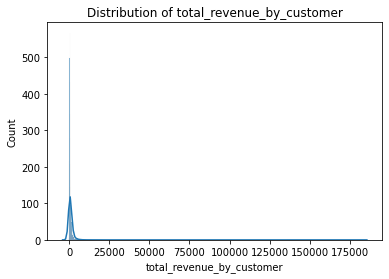

In [23]:
#Similarly we have to plot the different variablesto understand them
#Nonetheless for the purpose of it the structure of only one will be kept as a comment of the cell
# histogram for total_revenue_by_customer

sns.histplot(data  = retail,
         x     = 'total_revenue_by_customer',
        kde    = True)


# Adding title and axis labels
plt.title(label   = "Distribution of total_revenue_by_customer")
plt.xlabel(xlabel = "total_revenue_by_customer") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

#showing the graph
plt.show()

In [24]:
#we realized that the revenue has negative quantities and therefore we create two new columns taking into account this situation

#We start we the positive values for revenue
retail['positive_total_revenue_by_customer'] = retail['total_revenue_by_customer']

#start of the for loop
for index, value in retail.iterrows():
        
    # if the value is negative then it takes the 0 value
    if retail.loc[index, 'total_revenue_by_customer'] <= 0:
        retail.loc[index, 'positive_total_revenue_by_customer'] = 0
        
#print(retail["positive_total_revenue_by_customer"].value_counts())

In [25]:
#follow with negative values for revenue
retail['negative_total_revenue_by_customer'] = retail['total_revenue_by_customer']

#start of the for loop
for index, value in retail.iterrows():
        
    # start of if statement positive values then it takes 0
    if retail.loc[index, 'total_revenue_by_customer'] >= 0:
        retail.loc[index, 'negative_total_revenue_by_customer'] = 0
    
    #in the case we do have negative values we multiplied by -1
    else:
        retail.loc[index, 'negative_total_revenue_by_customer'] = retail.loc[index, 'negative_total_revenue_by_customer'] * -1
        
print(retail["negative_total_revenue_by_customer"].value_counts())

0.00       3924
15.00         3
19.90         2
19.80         2
11.50         2
11.80         2
1.25          2
12.73         1
464.90        1
36.92         1
12.45         1
2.10          1
162.72        1
6.65          1
49.90         1
23.28         1
145.68        1
10.17         1
5.95          1
29.70         1
274.29        1
15.30         1
2282.17       1
4.00          1
4287.63       1
17.00         1
171.23        1
33.94         1
24.05         1
7.13          1
10.60         1
4.57          1
40.95         1
5.80          1
49.35         1
10.15         1
88.93         1
51.00         1
4.50          1
14.90         1
33.35         1
719.94        1
251.30        1
80.55         1
27.70         1
828.08        1
20.40         1
168.98        1
30.60         1
102.45        1
14.50         1
76.71         1
13.30         1
18.24         1
306.64        1
276.90        1
1200.50       1
102.00        1
32.00         1
30.19         1
39.12         1
11.20         1
7.90    

In [26]:
#We noticed negative values for min quantity
retail['negative_min_quantity_per_customer'] = retail['min_quantity_per_customer']

#start of the for loop
for index, value in retail.iterrows():
        
    # start of if statement positive values then it takes 0
    if retail.loc[index, 'min_quantity_per_customer'] >= 0:
        retail.loc[index, 'negative_min_quantity_per_customer'] = 0
    
    #in the case we do have negative values we multiplied by -1
    else:
        retail.loc[index, 'negative_min_quantity_per_customer'] = retail.loc[index, 'negative_min_quantity_per_customer'] * -1

In [27]:
#We noticed negative values for min quantity
retail['positive_min_quantity_per_customer'] = retail['min_quantity_per_customer']

#start of the for loop
for index, value in retail.iterrows():
        
    # if the value is negative then it takes the 0 value
    if retail.loc[index, 'min_quantity_per_customer'] <= 0:
        retail.loc[index, 'positive_min_quantity_per_customer'] = 0
    
    #else it will keep the same values
    else:
        retail.loc[index, 'positive_min_quantity_per_customer'] = retail.loc[index, 'positive_min_quantity_per_customer']

In [28]:
#We noticed negative values for max quantity
retail['negative_max_quantity_per_customer'] = retail['max_quantity_per_customer']

#start of the for loop
for index, value in retail.iterrows():
        
    # start of if statement positive values then it takes 0 
    if retail.loc[index, 'max_quantity_per_customer'] >= 0:
        retail.loc[index, 'negative_max_quantity_per_customer'] = 0
    
    #in the case we do have negative values we multiplied by -1
    else:
        retail.loc[index, 'negative_max_quantity_per_customer'] = retail.loc[index, 'negative_max_quantity_per_customer'] * -1


In [29]:
#We noticed positive values for max quantity
retail['positive_max_quantity_per_customer'] = retail['max_quantity_per_customer']

#start of the for loop
for index, value in retail.iterrows():
        
    # if the value is negative then it takes the 0 value
    if retail.loc[index, 'max_quantity_per_customer'] <= 0:
        retail.loc[index, 'positive_max_quantity_per_customer'] = 0
    
    #else it will keep the same values
    else:
        retail.loc[index, 'positive_max_quantity_per_customer'] = retail.loc[index, 'positive_max_quantity_per_customer']


In [30]:
#We can see negative values for quantity
retail['negative_quantity_per_customer'] = retail['total_quantity_per_customer']

#start of a for loop
for index, value in retail.iterrows():
        
    # start of if statement positive values then it takes 0  
    if retail.loc[index, 'total_quantity_per_customer'] >= 0:
        retail.loc[index, 'negative_quantity_per_customer'] = 0
    
    #in the case we do have negative values we multiplied by -1
    else:
        retail.loc[index, 'negative_quantity_per_customer'] = retail.loc[index, 'negative_quantity_per_customer'] * -1

#we verify the variables of quantity      
#print(retail["negative_quantity_per_customer"].value_counts())

In [32]:
#We can see positive quantity per customer
retail['positive_quantity_per_customer'] = retail['total_quantity_per_customer']

#for loop starting here
for index, value in retail.iterrows():
        
    #if negative it will ake the variable 0 
    if retail.loc[index, 'total_quantity_per_customer'] <= 0:
        retail.loc[index, 'positive_quantity_per_customer'] = 0
    
    #else we keep the same results
    else:
        retail.loc[index, 'positive_quantity_per_customer'] = retail.loc[index, 'positive_quantity_per_customer']
        
print(retail["positive_quantity_per_customer"].value_counts())

0       141
27       28
44       27
62       26
67       26
       ... 
692       1
531       1
677       1
340       1
1831      1
Name: positive_quantity_per_customer, Length: 1001, dtype: int64


In [35]:
#we create the logarithm of all the variables that have skewness and sum it 0.0001 in case of zero

#we create the logarithm of the positive total revenue by customer which has 0 as a value
retail['log_positive_total_revenue_by_customer'] = np.log(retail['positive_total_revenue_by_customer'] + 0.0001)
#we create the logarithm of the negative total revenue by customer which has 0 as a value
retail['log_negative_total_revenue_by_customer'] = np.log(retail['negative_total_revenue_by_customer'] + 0.0001)

#we create the logarithm of positive max quantity by customer which has 0 as a value
retail['log_positive_max_quantity_per_customer'] = np.log(retail['positive_max_quantity_per_customer'] + 0.0001)
#we create the logarithm of negative max quantity by customer which has 0 as a value
retail['log_negative_max_quantity_per_customer'] = np.log(retail['negative_max_quantity_per_customer'] + 0.0001)

#we create the logarithm of the positive min quantity by customer which has 0 as a value
retail['log_positive_min_quantity_per_customer'] = np.log(retail['positive_min_quantity_per_customer'] + 0.0001)
#we create the logarithm of the positive min quantity by customer which has 0 as a value
retail['log_negative_min_quantity_per_customer'] = np.log(retail['negative_min_quantity_per_customer'] + 0.0001)

#we create the logarithm of the positive quantity by customer which has 0 as a value
retail['log_positive_quantity_per_customer'] = np.log(retail['positive_quantity_per_customer'] + 0.0001)
#we create the logarithm of the negative quantity by customer which has 0 as a value
retail['log_negative_quantity_per_customer'] = np.log(retail['negative_quantity_per_customer'] + 0.0001)

#we create the logarithm of the average spent per unit by customer which has 0 as a value
retail['log_average_spending_per_unit_per_customer'] = np.log(retail['average_spending_per_unit_per_customer'] + 0.0001)

#we create the logarithm of the positive total products by customer which has 0 as a value
retail['log_total_products_per_customer'] = np.log(retail['total_products_per_customer'])

#we create the logarithm of the positive total revenue by customer which has 0 as a value
retail['log_max_spend_per_unit_per_customer'] = np.log(retail['max_spend_per_unit_per_customer']+ 0.0001)
#we create the logarithm of the positive total revenue by customer which has 0 as a value
retail['log_min_spend_per_unit_per_customer'] = np.log(retail['min_spend_per_unit_per_customer']+ 0.0001)


In [36]:
# one hot encoding categorical variables
#We create the dummies for sex at birth
one_hot_sex_at_birth       = pd.get_dummies(retail['sex_at_birth'])
#We create the dummies for the occupatio 
one_hot_occupation         = pd.get_dummies(retail['occupation'])
#We create the dummies for the employment type
one_hot_employment_type = pd.get_dummies(retail['employment_type'])
#We create the dummies for education
one_hot_education = pd.get_dummies(retail['education'])
#We create the dummies for the marital status
one_hot_marital_status = pd.get_dummies(retail['marital_status'])
#We create the dummies for the household
one_hot_relationship_in_household = pd.get_dummies(retail['relationship_in_household'])
#We create the dummies for the race
one_hot_race      = pd.get_dummies(retail['race'])
#We create the dummies for country
one_hot_country      = pd.get_dummies(retail['country'])
#We create the dummies for age
one_hot_age      = pd.get_dummies(retail['age'])
#We create the dummies for completed years of education
one_hot_completed_years_of_education     = pd.get_dummies(retail['completed_years_of_education'])



# dropping categorical variables after they've been encoded
#We can now drop sex_at_birth due to the fact that the variables has been created
retail = retail.drop('sex_at_birth', axis = 1)
#We can now drop occupation due to the fact that the variables has been created
retail = retail.drop('occupation', axis = 1)
#We can now drop employment_type to the fact that the variables has been created
retail = retail.drop('employment_type', axis = 1)
#We can now drop education due to the fact that the variables has been created
retail = retail.drop('education', axis = 1)
#We can now drop marital_status due to the fact that the variables has been created
retail = retail.drop('marital_status', axis = 1)
#We can now drop relationship_in_household due to the fact that the variables has been created
retail = retail.drop('relationship_in_household', axis = 1)
#We can now drop race due to the fact that the variables has been created
retail = retail.drop('race', axis = 1)
#We can now drop country due to the fact that the variables has been created
retail = retail.drop('country', axis = 1)
#We can now drop age due to the fact that the variables has been created
retail = retail.drop('age', axis = 1)
#We can now drop completed_years_of_education due to the fact that the variables has been created
retail = retail.drop('completed_years_of_education', axis = 1)



# joining codings together of the dummies created
retail = retail.join([one_hot_sex_at_birth, one_hot_occupation, one_hot_employment_type,
                         one_hot_education,one_hot_marital_status,one_hot_relationship_in_household,
                         one_hot_race,one_hot_country,one_hot_age, one_hot_completed_years_of_education])

In [37]:
#Creation of a binary variable as it will help us create the logistic regression
retail['binary_type_of_client'] = None

#start of the for loop
for index, value in retail.iterrows():
    
    #wholesaler keep 1
    if retail.loc[index, 'type_of_client'] == 'Wholesaler' :
        retail.loc[index, 'binary_type_of_client'] = 1
    
    #personal keep 0
    elif retail.loc[index, 'type_of_client'] == 'Personal':
        retail.loc[index, 'binary_type_of_client'] = 0

#we want to see the number of variables
retail['binary_type_of_client'].value_counts()

1    805
0    169
Name: binary_type_of_client, dtype: int64

In [38]:
#We drop our NAs to create a model and train it
retail_drop = retail.dropna(axis=0)

In [39]:
#We create a for loop to make it easier to copy paste the columns
#start of the for loop
for col in retail_drop:
    #printing all the columns' name
    print(col)

customer_id
type_of_client
total_revenue_by_customer
average_spending_per_unit_per_customer
total_quantity_per_customer
total_products_per_customer
max_spend_per_unit_per_customer
min_spend_per_unit_per_customer
max_quantity_per_customer
min_quantity_per_customer
positive_total_revenue_by_customer
negative_total_revenue_by_customer
negative_min_quantity_per_customer
positive_min_quantity_per_customer
negative_max_quantity_per_customer
positive_max_quantity_per_customer
negative_quantity_per_customer
positive_quantity_per_customer
log_positive_total_revenue_by_customer
log_negative_total_revenue_by_customer
log_positive_max_quantity_per_customer
log_negative_max_quantity_per_customer
log_positive_min_quantity_per_customer
log_negative_min_quantity_per_customer
log_positive_quantity_per_customer
log_negative_quantity_per_customer
log_average_spending_per_unit_per_customer
log_total_products_per_customer
log_max_spend_per_unit_per_customer
log_min_spend_per_unit_per_customer
F
M
Adm-cleri

In [40]:
#We change the type of binary client
retail_drop['binary_type_of_client'] = retail_drop['binary_type_of_client'].astype('uint8')

#we veridy the information
retail_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 2 to 4057
Data columns (total 76 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   customer_id                                 974 non-null    int64  
 1   type_of_client                              974 non-null    object 
 2   total_revenue_by_customer                   974 non-null    float64
 3   average_spending_per_unit_per_customer      974 non-null    float64
 4   total_quantity_per_customer                 974 non-null    int64  
 5   total_products_per_customer                 974 non-null    int64  
 6   max_spend_per_unit_per_customer             974 non-null    float64
 7   min_spend_per_unit_per_customer             974 non-null    float64
 8   max_quantity_per_customer                   974 non-null    int64  
 9   min_quantity_per_customer                   974 non-null    int64  
 10  positive_tota

C:\Users\elyou\AppData\Local\Temp/ipykernel_25532/2442708051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_drop['binary_type_of_client'] = retail_drop['binary_type_of_client'].astype('uint8')


In [41]:
#we create our new data frame with all the necessary variables
retail_final = retail_drop[['customer_id',
'binary_type_of_client',
'log_positive_total_revenue_by_customer',
'log_negative_total_revenue_by_customer',
'log_positive_max_quantity_per_customer',
'log_negative_max_quantity_per_customer',
'log_positive_min_quantity_per_customer',
'log_negative_min_quantity_per_customer',
'log_positive_quantity_per_customer',
'log_negative_quantity_per_customer',
'log_average_spending_per_unit_per_customer',
'log_total_products_per_customer',
'log_max_spend_per_unit_per_customer',
'log_min_spend_per_unit_per_customer',
'F',
'Adm-clerical',
'Craft-repair',
'Exec-managerial',
'Farming-fishing',
'Handlers-cleaners',
'Machine-op-inspct',
'Prof-specialty',
'Sales',
'Service',
'Tech-support',
'Government',
'Private',
'Assoc-voc',
'Association',
'Bachelors',
'HS-grad',
'Masters_or_Doctorate',
'No_Diploma',
'Divorced',
'Married-civ-spouse',
'Never-married',
'Separated',
'Husband',
'Not-in-family',
'Other-relative',
'Own-child',
'Unmarried',
'Black',
'White',
'United-States',
'Gen X',
'Gen Z',
'Millennials',
'1-10',]]

#we analyze the data
#retail_final.head(n =  5)

2.- Logistic Regression.

This logistic regression model takes into account the binary type of client
of approximately 1,000 observations base on 47 columns from the retail final table.
We are considering test size of 0.25 and a random state of 219.

Our model has an accuracy of 0.83 with a precision value for Personal of 0.67.
The precision value for Wholesaler is 0.83.

Additionally, our model is not overfitted when comparing the train and test scores.

The GAP score between test and train scores is less than 0.05.

Our ROC curve support our results and helps to understand how fitted is our model.



In [42]:
#####Building a logistic regression model
#################################################

# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create arrays for the features and the response variable

y_logreg = retail_final['binary_type_of_client'].values
X_logreg = retail_final.drop(['binary_type_of_client', 'customer_id'],
                      axis = 1).values

# Create training and test sets
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(X_logreg, y_logreg,
                                                                                test_size = 0.25,random_state = 219)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
log_fit = logreg.fit(X_train_logreg,y_train_logreg)

# Predict the labels of the test set: y_pred
y_pred_logreg_test = logreg.predict(X_test_logreg)
y_pred_logreg_train = logreg.predict(X_train_logreg)

# Compute and print the confusion matrix and classification report

#construction of the matrix logistic for the training set
confusion_matrix_logistic_regression_train      = confusion_matrix(y_train_logreg, y_pred_logreg_train)
classification_report_logistic_regression_train = classification_report(y_train_logreg, y_pred_logreg_train)

#construction of the matrix logistic for the testing set
confusion_matrix_logistic_regression_test       = confusion_matrix(y_test_logreg, y_pred_logreg_test)
classification_report_logistic_regression_test  = classification_report(y_test_logreg, y_pred_logreg_test)

#we store the scores of both the train and test
logreg_train_score = logreg.score(X_train_logreg, y_train_logreg).round(4)
logreg_test_score = logreg.score(X_test_logreg, y_test_logreg).round(4)

#we print both scores
print('Training Score :', logreg_train_score)
print('Testing Score  :', logreg_test_score)

# displaying and saving the gap between training and testing
print('\nLogistic Regression Train-Test Gap :', abs(logreg_train_score - logreg_test_score).round(4))

#we store the gap
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

#We create a confusion_matrix based on the scores mentionned before
print(confusion_matrix_logistic_regression_test)
print(classification_report_logistic_regression_test)

Training Score : 0.8753
Testing Score  : 0.832

Logistic Regression Train-Test Gap : 0.0433
[[ 12  35]
 [  6 191]]
              precision    recall  f1-score   support

           0       0.67      0.26      0.37        47
           1       0.85      0.97      0.90       197

    accuracy                           0.83       244
   macro avg       0.76      0.61      0.64       244
weighted avg       0.81      0.83      0.80       244



C:\Users\elyou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


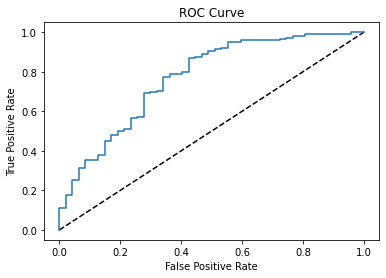

In [43]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob_logreg = logreg.predict_proba(X_test_logreg)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_logreg, y_pred_prob_logreg)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

3.- Knn classification model.

This Knn classification model takes into account the binary type of client
of approximately 1,000 observations base on 47 columns from the retail final table.
We are considering test size of 0.25 and a random state of 219.

Our model has an accuracy of 0.83 with a precision value for Personal of 0.71.
The precision value for Wholesaler is 0.83.

Additionally, our model is not overfitted when comparing the train and test scores.

The GAP score between test and train scores is less than 0.05.

Our ROC curve support our results and helps to understand how fitted is our model.



In [45]:
#####Building a Knn regression model
#################################################

# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable

y_knn = retail_final['binary_type_of_client'].values
X_knn = retail_final.drop(['binary_type_of_client', 'customer_id'],
                      axis = 1).values

# Create training and test sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, 
                                                                    test_size = 0.25,random_state = 219)

knn = KNeighborsClassifier(n_neighbors = 9)

# Fit the classifier to the training data
knn.fit(X_train_knn, y_train_knn)

# Predict the labels of the test data: y_pred
y_pred_knn_test = knn.predict(X_test_knn)
y_pred_knn_train = knn.predict(X_train_knn)

# Generate the confusion matrix and classification report

#Creation of the confusion matrix for the train data
confusion_matrix_knn_train      = confusion_matrix(y_train_knn, y_pred_knn_train)
classification_report_knn_train = classification_report(y_train_knn, y_pred_knn_train)

#Creation of the confusion matrix for the test data
confusion_matrix_knn_test       = confusion_matrix(y_test_knn, y_pred_knn_test)
classification_report_knn_test  = classification_report(y_test_knn, y_pred_knn_test)

#We store the score of the train and test datasets
knn_train_score = knn.score(X_train_knn, y_train_knn).round(4)
knn_test_score = knn.score(X_test_knn, y_test_knn).round(4)

#we print the scores
print('Training Score :', knn_train_score)
print('Testing Score  :', knn_test_score)

# displaying and saving the gap between training and testing
print('\nKNN Train-Test Gap :', abs(knn_train_score - knn_test_score).round(4))
knn_test_gap = abs(knn_train_score - knn_test_score).round(4)

#We finally print the confusion matrix as well as the final results
print(confusion_matrix_knn_test)
print(classification_report_knn_test)

Training Score : 0.8753
Testing Score  : 0.832

KNN Train-Test Gap : 0.0433
[[ 10  37]
 [  4 193]]
              precision    recall  f1-score   support

           0       0.71      0.21      0.33        47
           1       0.84      0.98      0.90       197

    accuracy                           0.83       244
   macro avg       0.78      0.60      0.62       244
weighted avg       0.82      0.83      0.79       244



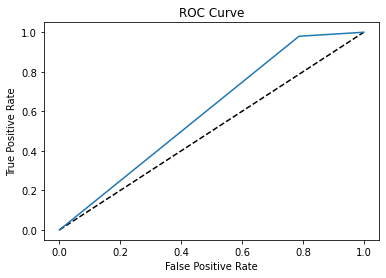

In [46]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test_knn)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_knn, y_pred_knn_test)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Neighbors Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [47]:
# comparing results

#We print the information for the Logistic Regression
print(f"""
Logistic Regression                  
-------------------
Confusion Matrix TRAIN Data                      

{confusion_matrix_logistic_regression_train}  

Confusion Matrix TEST Data

{confusion_matrix_logistic_regression_test}

Classification Model TRAIN Data

{classification_report_logistic_regression_train} 

Classification Model TEST Data

{classification_report_logistic_regression_test}""")

#We print the information about the KNN classification

print(f"""
KNN
-------------------------
Confusion Matrix TRAIN Data                      

{confusion_matrix_knn_train}  

Confusion Matrix TEST Data

{confusion_matrix_knn_test}

Classification Model TRAIN Data

{classification_report_knn_train} 

Classification Model TEST Data

{classification_report_knn_test}
""")


Logistic Regression                  
-------------------
Confusion Matrix TRAIN Data                      

[[ 42  80]
 [ 11 597]]  

Confusion Matrix TEST Data

[[ 12  35]
 [  6 191]]

Classification Model TRAIN Data

              precision    recall  f1-score   support

           0       0.79      0.34      0.48       122
           1       0.88      0.98      0.93       608

    accuracy                           0.88       730
   macro avg       0.84      0.66      0.70       730
weighted avg       0.87      0.88      0.85       730
 

Classification Model TEST Data

              precision    recall  f1-score   support

           0       0.67      0.26      0.37        47
           1       0.85      0.97      0.90       197

    accuracy                           0.83       244
   macro avg       0.76      0.61      0.64       244
weighted avg       0.81      0.83      0.80       244


KNN
-------------------------
Confusion Matrix TRAIN Data                      

[[ 45  77

In [48]:
#We create the datasets to predict with the unknown variables with the same columns that helped us do our model
retail_to_predict = retail[['customer_id',
'binary_type_of_client',
'log_positive_total_revenue_by_customer',
'log_negative_total_revenue_by_customer',
'log_positive_max_quantity_per_customer',
'log_negative_max_quantity_per_customer',
'log_positive_min_quantity_per_customer',
'log_negative_min_quantity_per_customer',
'log_positive_quantity_per_customer',
'log_negative_quantity_per_customer',
'log_average_spending_per_unit_per_customer',
'log_total_products_per_customer',
'log_max_spend_per_unit_per_customer',
'log_min_spend_per_unit_per_customer',
'F',
'Adm-clerical',
'Craft-repair',
'Exec-managerial',
'Farming-fishing',
'Handlers-cleaners',
'Machine-op-inspct',
'Prof-specialty',
'Sales',
'Service',
'Tech-support',
'Government',
'Private',
'Assoc-voc',
'Association',
'Bachelors',
'HS-grad',
'No_Diploma',
'Masters_or_Doctorate',
'Divorced',
'Married-civ-spouse',
'Never-married',
'Separated',
'Husband',
'Not-in-family',
'Other-relative',
'Own-child',
'Unmarried',
'Black',
'White',
'United-States',
'Gen X',
'Gen Z',
'Millennials',
'1-10',]]

4.- Predicting the unknown variables

We fit the model in the missing observations for the type of client variable.

To do so we created a table of 47 columns with the unknown variables and used the
predict function. We finally joined the customer ID table with the type of client 
for Flora company to reach out the Wholesalers.


In [49]:
#we create a customer_id dataframe
customer_id_df = retail_to_predict['customer_id']

In [50]:
#This will enable us to have only the data with null variables in type of clients
retail_to_predict = retail_to_predict.loc[pd.isnull(retail_to_predict).any(1),:]

In [51]:
#We drop customer_id and binary type of client to have the same number of columns
retail_to_predict = retail_to_predict.drop(['binary_type_of_client', 'customer_id'],
                      axis = 1)

#We reset the index of our model
retail_to_predict = retail_to_predict.reset_index()

#and we drop the column index to have the same number of columns
retail_to_predict = retail_to_predict.drop(['index'],
                                          axis = 1)

In [52]:
#we fit our model into the new dataset to identify it
label = log_fit.predict(retail_to_predict)

C:\Users\elyou\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [53]:
#we change the array into column
labels = pd.DataFrame(label, columns = ['label'])

#we join it with the customer id the label and the customer id data frame
retail_to_predict = retail_to_predict.join([customer_id_df,labels])

In [55]:
#We transform back the 0 and 1 with Wholesaler and Personal
#start the for loop
for index, value in retail_to_predict.iterrows():
    
    #start the if statement if Wholesaler
    if retail_to_predict.loc[index, 'label'] == 1 :
        retail_to_predict.loc[index, 'label'] = 'Wholesaler'
    #value in case Personal
    elif retail_to_predict.loc[index, 'label'] == 0:
        retail_to_predict.loc[index, 'label'] = 'Personal'

#we verify the number of values        
retail_to_predict['label'].value_counts()

Wholesaler    2660
Personal       424
Name: label, dtype: int64

In [56]:
#we can see the final results for the first 20 rows
retail_to_predict[['customer_id', 'label']].head(n=20)

,customer_id,label
0,528056,Wholesaler
1,1296893,Wholesaler
2,4223924,Wholesaler
3,4523882,Wholesaler
4,5060461,Wholesaler
5,7199299,Wholesaler
6,7775023,Wholesaler
7,8799332,Wholesaler
8,12379538,Wholesaler
9,12667659,Wholesaler


5.- Final Conclusions

The limitations
The limitations for a logistic regression algorithm are related to capturing the effect of multiple or non-linear decision limits. Our results should not be fundamentally different from the ones we got, but they would be different and there is a space for a model improvement.


The advantages
Some advantages of the model are related to the flexibility of incorporating different variables (iteration) and the simplicity of running it to classify objects with acceptable precision.
Using the ER diagram was key for us to complete our queries as it enabled us to identify rapidly the keys from each table as well as from which table we would need the information. 
